# Introduction to Permutation Model

This Notebook will cover:
1. Why we need to estimate bias term
2. Dice examples -- discrete variables
3. Permutation Model
4. Continuous data with bins examples

We assume a set of discrete random variables $\mathcal{X} = \{X_1, X_2,\dots,X_n\}$ and $Y = \{Y_1, Y_2, \dots, Y_n\}$ is the labels of their joint examples $D = \{(X_1, Y_1), (X_2, Y_2),\dots, (X_n, Y_n)\}$.  

First, we recap __bias__:
$$
Bias = E_n(\hat I(\mathcal{X}; Y)) - I_n(\mathcal{X};Y) 
$$

In this notebook, we consider $I_n(\mathcal{X};Y)=0$, Then $E(\hat I_n(\mathcal{X}; Y))$ is the bias term and we called it __expectation of reliable mutual information__.

When we estimate empirical mutual information $\hat I(\mathcal{X}, Y)$, we have 
$$
\hat I(\mathcal{X}, Y) = E_n(\hat I(\mathcal{X}, Y)) + \hat I_n(\mathcal{X}, Y).
$$ 
where $\hat I_n(\mathcal{X}, Y)$ is the real mutual information term and we named it __real mutual information__. This term is not only accounts for __dependency by chance__ but also need to do __time efficiency__.  i.e. Dice examples.

To easily capture the trend of $\hat I_n(\mathcal{X}, Y)$, we introduce __fraction of mutual information__, defined as:
$$
\hat F_n(\mathcal{X}, Y) = \frac{I_n(\mathcal{X}, Y)}{\hat H(Y)}
$$
where $\hat H(Y)$ is constant normalization, $\hat F_n(\mathcal{X}, Y)=1$ means functional dependent and $\hat F_n(\mathcal{X}, Y)=0$ refers to statistical independent.  

If data is fixed, creating more bins get closer to real fraction of mutual information as:
$$
max F^k(\mathcal{X}, Y) = F(\mathcal{X}, Y)
$$
However, for random samples, creating more bins get far away from real mutual information as:
$$
\hat max F^k(\mathcal{X}, Y) \rightarrow 1 \text{  if k is large enough}
$$
which means:
$$
bias >> 0 \text{  if k is large enough}
$$

## 1. Mutual Information Between Independent Dices

In this task, We replicate two dice experiments. We use $d_1,d_2,d_3,d_4,d_5$ to indicate dice number.  
* In the first experiment, we use 2 dices to estimate mutual information $\hat F (d_1;d_2)$  


* In the first experiment, we extend 2 dices to 5 dices and estimate mutual information $\hat F (\{d_1,d_2,d_3,d_4\};d_5)$   

## Formula
We first define __shannon Entropy__ $H(Y)$

$H(Y) = -\sum_{y \in Y} p(y)log(p(y))$   

Next, we use conditional shannon Entropy $H(Y|X)$

$H(Y|\mathcal{X}) = \sum_{x\in \mathcal{X}} p(x)H(Y|\mathcal{X} = x)$  

$=-\sum_{x\in \mathcal{X}}\sum_{y \in Y}p(x)p(y|x)log(p(y|x))$  

$=-\sum_{x\in \mathcal{X}}\sum_{y \in Y}p(x,y)log(p(y|x))$  

$=-\sum_{x\in \mathcal{X}}\sum_{y \in Y}p(x,y)log(\frac{p(x,y)}{p(x)})$  

With these, mutual information $\hat I (Y;\mathcal{X})= H(Y) - H(Y｜\mathcal{X})$  can be rewrite as  

$\hat I (\mathcal{X}; Y)= -\sum_{y \in Y} p(y)log(p(y)) + \sum_{x\in \mathcal{X}}\sum_{y \in Y}p(x,y)log(\frac{p(x,y)}{p(x)})$  



In [1]:
# import libraries
import random 
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from Permutation import *
from Functions import *
from VariableSelctionMI import *
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 1000)

In [2]:
# create random dice
def rand_dice():
    return random.randint(1,6)

### 1.1 First experiemt to estimate $\hat F(d_1;d_2)$

In this experiment, we perform 50 independent rolls and compute $\hat F(d_1;d_2)$ to estimate mutual information. We use [6] to indecate the range of dice number [1,2,3,4,5,6]

$$
\hat I(d_1;d_2) = -\sum_{d_2 \in [6]} p(d_2)log(p(d_2)) + \sum_{d_1\in [6]}\sum_{d_2 \in [6]}p(d_1,d_2)log(\frac{p(d_1,d_2)}{p(d_1)})
$$

$$
\hat F(d_1;d_2) = \hat I(d_1;d_2)/ \hat H(d_2)
$$  
We repeat this process with 10,000 simulations and plot histogram for 20 equal-frequency bins 

In [3]:
def generate_dice2(rep):
    """
    This part is for generate 2 independent dices
    Input: rep: number of repetations
    Output: dice1_dic: a dictonary of (d1) and p(d1), 
            dice2_dic: a dictionary of d2 and p(d2)
            keys_list: a list contains tuple like (d1, d2) 
            value_list: a list contains p(d1,d2) 
            dice2_list: a list contains p(d2)
    """
    # initial and create [(d1,d2)] list
    alist = []
    for i in range(rep):
        tple = (rand_dice(), rand_dice())
        alist.append(tple)
        
    # count [(d1,d2)] into dictionary 
    dic = {}
    for each in alist:
        if each not in dic.keys():
            dic[each] = 1
        else:
            dic[each] += 1
    
    # change [(d1,d2)] counts into sublist and calculate p(d1,d2) probability
    keys_list = []
    value_list = []
    for key, value in dic.items():
        keys_list.append(key)
        value_list.append(value)
        
    sum_value = sum(value_list)    
    value_list = [each/sum_value for each in value_list]
        
    #initial d1, d2  list
    dice1_list = [0]* 6
    dice2_list = [0]* 6
    keys = [1,2,3,4,5,6]
    
    # count two dice events
    for each in alist:
        dice1_list[each[0]-1] += 1
        dice2_list[each[1]-1] += 1
    
    # change count to probability
    sum_1 = sum(dice1_list)    
    dice1_list = [each/sum_1 for each in dice1_list]
    sum_2 = sum(dice2_list)    
    dice2_list = [each/sum_2 for each in dice2_list]
    
    dice1_dic = dict(zip(keys, dice1_list))
    dice2_dic = dict(zip(keys, dice2_list))
    
    return dice1_dic, dice2_dic, keys_list, value_list, dice2_list

In [4]:
def main(rep, permutation=False):
    """
    This part is generate 5 independent dices and calculate mutual information.\
    Input: rep: number of repetations
    Output: alist: a list contains multiple estimate mutual information in each experiment
    """
    # initial whole result list
    alist = []
    for _ in range(10000):
        result = 0
        x_dic,y_dic,key_list,xy_list,y_list = generate_dice2(rep)
        
        # calculate H(d2)
        for each in y_list:
            if each != 0:
                result -= each * math.log(each,2)
        hy = result
        # calculate H(d2) - H(d2|d1=x)    
        for i in range(len(key_list)):
            x_indx = key_list[i][0] # x variable
            result += xy_list[i]*math.log(xy_list[i]/x_dic[x_indx],2)
        #result = gain(x_freq, y_freq)
        if permutation:
            x_freq = [[key_list[i][0]]*int(xy_list[i]*rep) for i in range(len(xy_list))]
            y_freq = [[key_list[i][1]]*int(xy_list[i]*rep) for i in range(len(xy_list))]
            x_freq = np.array([item for sublist in x_freq for item in sublist])
            y_freq = np.array([item for sublist in y_freq for item in sublist])
            permut = Permutation(x_freq, y_freq).summary()
            result -= permut
        result /= hy
        alist.append(result)
    return alist

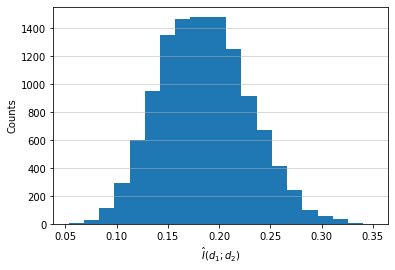

In [5]:
exp1 = main(50)
interval = (max(exp1) - min(exp1))/19 
bins = [interval * i for i in range(20)]
#plt.hist(alist, bins = bins)
plt.hist(x=exp1, bins=20, width = 0.035)
plt.ylabel('Counts')
plt.xlabel('$\hat I(d_1;d_2)$')
plt.grid(axis='y', alpha=0.6)
plt.show()

In [6]:
exp1_mean = np.mean(exp1)
print('Expectation of fraction mutual information between 2 dices is: ', str(exp1_mean))

Expectation of fraction mutual information between 2 dices is:  0.17572679104955716


### 1.2 Conculsion

In the first experiment, due to $d_1,d_2$ are independent, we should have $F(d_1;d_2) = 0$. But estimate mutual information histogram plot has right tail and $E(\hat F(d_1;d_2)) \approx 0.17$

### 2.1 Second experiemt to estimate $\hat F(\{d_1, d_2, d_3, d_4\};d_5)$

In this experiment, we perform 50 independent rolls and compute $\hat I(\{d_1, d_2, d_3, d_4\};d_5)$ to estimate mutual information. We use [6] to indecate the range of dice number [1,2,3,4,5,6]

$$
\hat I(\{d_1, d_2, d_3, d_4\};d_5) = -\sum_{d_5 \in [6]} p(d_5)log(p(d_5)) + \sum_{\{d_1, d_2, d_3, d_4\} \in \{[6],[6],[6],[6]\}}\sum_{d_5 \in [6]}p(d_1, d_2, d_3, d_4, d_5)log(\frac{p(d_1, d_2, d_3, d_4, d_5)}{p(d_1, d_2, d_3, d_4)})
$$

$$
\hat F(\{d_1, d_2, d_3, d_4\};d_5) = \hat I(\{d_1, d_2, d_3, d_4\};d_5)/\hat H(d_5)
$$

We repeat this process with 10,000 simulations and plot histogram for 20 equal-frequency bins 

In [7]:
def generate_dice5(rep):
    """
    This part is for generate 5 independent dices
    return: dic14_dic: a dictonary of (d1,d2,d3,d4) and p(d1,d2,d3,d4), 
            dice5_dic: a dictionary of d5 and p(d5)
            keys_list: a list contains ({d1,d2,d3,d4},d5) 
            value_list: a list contains p({d1,d2,d3,d4},d5) 
            dice5_list: a list contains p(d5)
    """
    # initial [(d1,d2,d3,d4),d5]
    alist = []
    # create [(d1,d2,d3,d4),d5]
    for i in range(rep):
        tple1 = (rand_dice(), rand_dice(),rand_dice(), rand_dice()) #(d1,d2,d3,d4)
        tple = (tple1, rand_dice()) # (d1,d2,d3,d4),d5
        alist.append(tple)
    
    # count [(d1,d2,d3,d4),d5] into dictionary
    dic = {}
    for each in alist:
        if each not in dic.keys():
            dic[each] = 1
        else:
            dic[each] += 1
    
    # key_list contains [(d1,d2,d3,d4),d5], and value list contains corresponding counts 
    keys_list = []
    value_list = []
    for key, value in dic.items():
        keys_list.append(key)
        value_list.append(value)
    
    # change counts into probability
    sum_value = sum(value_list)    
    value_list = [each/sum_value for each in value_list]
        
    #initial dice5 list (y list)
    dice5_list = [0]*6

    keys = [1,2,3,4,5,6]
    
    # count dice 5 events
    for each in alist:
        dice5_list[each[1]-1] += 1
    
    # change count to probability and store it in dictionary
    sum_5 = len(alist)    
    dice5_list = [each/sum_5 for each in dice5_list]
    dice5_dic = dict(zip(keys, dice5_list))
    
    # initial dice 1-4 dictionary(x)
    dic14_dic = {}
    for each in alist:
        if each[0] not in dic14_dic.keys():
            dic14_dic[each[0]] = 1/sum_5
        else:
            dic14_dic[each[0]] += 1/sum_5
    
    return dic14_dic, dice5_dic, keys_list, value_list, dice5_list

In [8]:
def main1(rep, permutation=False):
    """
    This part is generate 5 independent dices and calculate mutual information.
    return: alist: a list contains multiple estimate mutual information in each experiment
    """
    alist = []
    for _ in range(10000):
        result = 0
        x_dic, y_dic, key_list, comb_list, y_list = generate_dice5(rep)
        #  calculate H(d1,d2,d3,d4)
        for each in y_list:
            if each != 0:
                result -= each * math.log(each,2)
        hy = result
        # calculate H(d1,d2,d3,d4) - H(d5|d1,d2,d3,d4)
        for i in range(len(key_list)):
            d1 = key_list[i][0][0] # dice 1
            d2 = key_list[i][0][1] # dice 2
            d3 = key_list[i][0][2] # dice 3
            d4 = key_list[i][0][3] # dice 4
            result += comb_list[i]*math.log(comb_list[i]/x_dic[(d1,d2,d3,d4)],2)
            
        if permutation:
            x_freq = [[key_list[i][0]]*int(comb_list[i]*rep) for i in range(len(comb_list))]
            y_freq = [[key_list[i][1]]*int(comb_list[i]*rep) for i in range(len(comb_list))]
            x_freq = np.array([item for sublist in x_freq for item in sublist])
            y_freq = np.array([item for sublist in y_freq for item in sublist])
            permut = Permutation(x_freq, y_freq).summary()
            result -= permut
        result /= hy
        alist.append(result)
    return alist

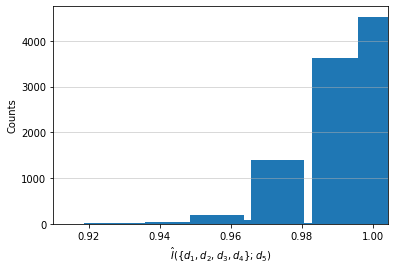

In [9]:
exp2 = main1(50)
interval = (max(exp2) - min(exp2))/19 
bins = [interval * i for i in range(20)]
#plt.hist(alist, bins = bins)
plt.hist(x=exp2, bins=20, width = 0.015)
plt.ylabel('Counts')
plt.xlabel('$\hat I(\{d_1, d_2, d_3, d_4\};d_5)$')
plt.grid(axis='y', alpha=0.6)
plt.show()

In [10]:
exp2_mean = np.mean(exp2)
print('Expectation of fraction mutual information between 5 dices is: ', str(exp2_mean))

Expectation of fraction mutual information between 5 dices is:  0.987635749606335


### 2.2 Conculsion

In the second experiment, due to all 5 dices are independent, we should have $\hat F(\{d_1, d_2, d_3, d_4\};d_5) = 0$. But estimate mutual information histogram plot has right tail and $E(\hat F(\{d_1, d_2, d_3, d_4\};d_5)) \approx 0.99$

## 3. Permutation Model

One of the solution to detect bias term $E_n(\hat I(\mathcal{X}, Y))$ is __permutation model__. Bias term $E_n(\hat I(\mathcal{X}, Y))$ can be defined as:
$$
E_n(\hat I(\mathcal{X}, Y))= \frac{1}{n!}\sum_{\sigma \in S_n}\hat I(\mathcal{X}, Y_\sigma)
$$  
, where $S_n$ is all possible samples after all possible permutation and $\{\mathcal{X}, Y_\sigma\} \rightarrow S_n = \{(X_1, Y_{1\sigma}),\dots, (X_n, Y_{n\sigma})\}$  
Correction term can be defined as:
$$
E(I_n (\mathcal{X}, Y)) = \hat I(\mathcal{X}, Y) - E_n(\hat I(\mathcal{X}, Y))
$$  


It is hard to compute $E_n(\hat I(\mathcal{X}, Y))$ with $n!$ possible permutations. We will use __contingency table__ to solve this problem.
We observed domain $V(\mathcal{X}) = \{X_1, X_2, \dots, X_R\}$ and $V(\mathcal{Y}) = \{Y_1, Y_2,\dots, Y_C\}$. Then, we use marginal counts $a_i = c(\mathcal{X}=x_i)$, $b_j = c(Y=y_j)$ and $c_{i,j} = c(\mathcal{X}=x_i, Y=y_j)$. The joint count $\mathbb{c} = \{c_{i,j}: 1 \leq i\leq R, 1\leq j\leq C\}$  
The empirical mutual information can be computed as :
\begin{align}
\hat I(\mathcal{X}, Y) &= I(\mathbb{c}) \\
&= H(Y) - H(Y|\mathcal{X}) \\
&= \sum_{j=1}^Cp(Y=y_j)log(1/p(Y=y_j)) - \sum_{i=1}^{R}\sum_{j=1}^{C}p(\mathcal{X}=x_i, Y=y_j)log(p(\mathcal{X}=x_i)/p(\mathcal{X}=x_i, Y=y_j)) \\
&= \sum_{i=1}^{R}\sum_{j=1}^{C}p(c_{i,j})log(\frac{n}{b_j}) - \sum_{i=1}^{R}\sum_{j=1}^{C}p(c_{i,j})log(\frac{c_{i,j}n}{na_i})\\
&= \sum_{i=1}^{R}\sum_{j=1}^{C}\frac{c_{i,j}}{n}log(\frac{c_{i,j} n}{a_ib_j})
\end{align}

Then, for $\sigma \in S_n$, if we consider $\mathcal{T} = \{\mathbb{c}^\sigma \in S_n \}$ as the set of all possible contingency tables.

\begin{align}
E_n(\hat I(\mathcal{X}, Y)) &= \sum_{\mathbb{C}^\sigma \in \mathcal{T}}\sum_{i=1}^{R}\sum_{j=1}^{C} \hat p_n(\mathbb{C}^\sigma)\frac{c^\sigma_{i,j}}{n}log(\frac{c^\sigma_{i,j}n}{a_ib_j}) \\
&= \sum_{c_{i,j}=0}^n\sum_{i=1}^{R}\sum_{j=1}^{C} \hat p_n(c_{i,j})\frac{c_{i,j}}{n}log(\frac{c_{i,j}n}{a_ib_j}) 
\end{align}


i.e. If we have following examples 

|X  	|Y 	    |
|:-:	|:-:	|
|a      |c      |
|a      |c      |
|a      |d      |
|a      |d      |
|a      |d      |
|b      |d      |      
|b      |d      |      
|b      |c      |      


| Y\X  	| a	    | b 	|Total |
|:-:	|:-:	|:-:	|:     | 
|c      |2      |1      |3     |
|d      |3      |2      |5     |
|Total  |5      |3      |8     |



i.e. If we permut above examples 

|X  	|Y 	    |
|:-:	|:-:	|
|a      |d      |
|a      |c      |
|a      |d      |
|a      |d      |
|a      |d      |
|b      |d      |      
|b      |c      |      
|b      |c      |      


| Y\X  	| a	    | b 	|Total |
|:-:	|:-:	|:-:	|:     | 
|c      |1      |2      |3     |
|d      |4      |1      |5     |
|Total  |5      |3      |8     |

No matter how many times we permute data, marginal counts $a_i = c(\mathcal{X}=x_i)$, $b_j = c(Y=y_j)$ are always constant. $c_{i, j}$ always has the range of $c_{i,j} \in [max(0, a_i + b_j - n), min(a_i, b_j)]$.  

Under the permutation model, the empirical counts $c_{i,j}$ follow hyper-geometrical distribution.
ie
$$
\hat p_0(c_{i,j}=k) = (b_j , k) (n-b_j, a_i-k)/(n, a_i)
$$

## 4. Repeat Experiment

In this section, we want to justify that permutation model can detect expectation of realiable mutual information. It can improve our result closed to real mutual information.

First, we repeat Experiment1:
* we use 2 dices to estimate mutual information $\hat I (d_1;d_2)$  

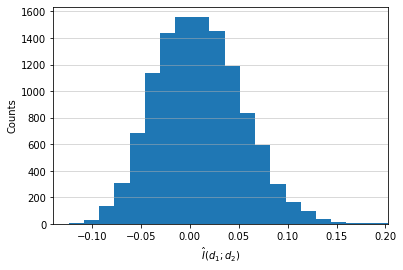

In [11]:
exp1_rep = main(50, permutation=True)
interval = (max(exp1_rep) - min(exp1_rep))/19 
bins = [interval * i for i in range(20)]
#plt.hist(alist, bins = bins)
plt.hist(x=exp1_rep, bins=20, width = 0.035)
plt.ylabel('Counts')
plt.xlabel('$\hat I(d_1;d_2)$')
plt.grid(axis='y', alpha=0.6)
plt.show()

In [12]:
print('Expectation of fraction mutual information between 2 dices is: ', str(np.mean(exp1_rep)))

Expectation of fraction mutual information between 2 dices is:  0.00012853158373312746


### 4.1 Conculsion

In the first experiment, due to 2 independent dices, we have $I(d_1;d_2) = 0$. But estimate mutual information histogram plot has right tail and $E(\hat I(d_1;d_2)) \approx 0.44$. After this repeat experiment, we add permutation model to detect bias and we get closed result $E(\hat I(d_1;d_2)) \approx 0$

Then, we repeat Experiment2:
* we use 5 dices to estimate mutual information $\hat I(\{d_1, d_2, d_3, d_4\};d_5)$

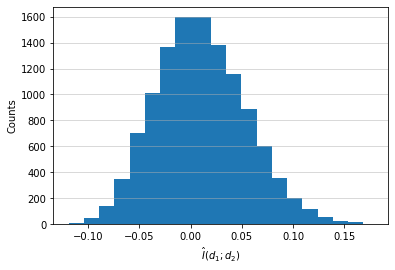

In [13]:
exp2_rep = main(50, permutation=True)
interval = (max(exp2_rep) - min(exp2_rep))/19 
bins = [interval * i for i in range(20)]
#plt.hist(alist, bins = bins)
plt.hist(x=exp2_rep, bins=20, width = 0.035)
plt.ylabel('Counts')
plt.xlabel('$\hat I(d_1;d_2)$')
plt.grid(axis='y', alpha=0.6)
plt.show()

In [14]:
print('Expectation of fraction mutual information between 2 dices is: ', str(np.mean(exp2_rep)))

Expectation of fraction mutual information between 2 dices is:  0.0005053368151427727


### 4.2 Conculsion

In the second experiment, We have $\hat F(\{d_1, d_2, d_3, d_4\};d_5) = 0$. But estimate mutual information histogram plot has right tail and $E(\hat F(\{d_1, d_2, d_3, d_4\};d_5)) \approx 0.99$. After this repeat experiment, we add permutation model to detect bias and we get closed result $E(\hat F(\{d_1, d_2, d_3, d_4\};d_5)) \approx 0$

## 5. Binning Continuous data

### 5.1 Experiment 1
In this case, we want to test MI gain of independent continuous variables $(X,Y) \in N(0, 1)$  
We use method: `equal frequency`

In [22]:
col_dict = dict(zip(['fraction_of_MI', 'reliable_fraction_of_MI'], [[0 for _ in range(201)] for _ in range(2)]))
df_ex1_freq = pd.DataFrame(col_dict)
rep = 20
for i in range(rep):
    mu, sigma = 0, 1 # mean and standard deviation
    x = np.random.normal(mu, sigma, 200)
    #y_1 = [0 for _ in range(100)]
    #y_2 = [1 for _ in range(100)]
    #y = np.array(y_1 + y_2)
    y = np.random.normal(mu, sigma, 200)
    for each in range(0, 200+1):
        # variable selection
        bin_indi_variables, bin_multi_variables = VariableSelectionMI(estimator = naive_estimate, 
                                                                      x = x, 
                                                                      y = y, 
                                                                      column_names = ['x'],
                                                                      bin_type = 'freq',
                                                                      xbin=True,
                                                                      x_bin = each,
                                                                      ybin=False).summary()
        df_ex1_freq.loc[each, 'fraction_of_MI'] += bin_indi_variables[0][0]/rep
        
        bin_indi_variables, bin_multi_variables = VariableSelectionMI(estimator = naive_estimate, 
                                                                      x = x, 
                                                                      y = y, 
                                                                      column_names = ['x'],
                                                                      bin_type = 'freq',
                                                                      xbin=True,
                                                                      x_bin = each,
                                                                      ybin=False,
                                                                      permut=True).summary()
        df_ex1_freq.loc[each, 'reliable_fraction_of_MI'] += bin_indi_variables[0][0]/rep

Text(0, 0.5, 'MI Gain')

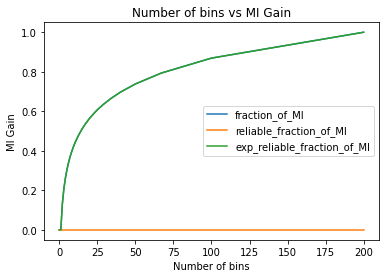

In [23]:
df_ex1_freq['exp_reliable_fraction_of_MI'] = df_ex1_freq['fraction_of_MI'] - df_ex1_freq['reliable_fraction_of_MI']
ax = df_ex1_freq.plot(title='Number of bins vs MI Gain')
ax.set_xlabel("Number of bins")
ax.set_ylabel('MI Gain')

<AxesSubplot:>

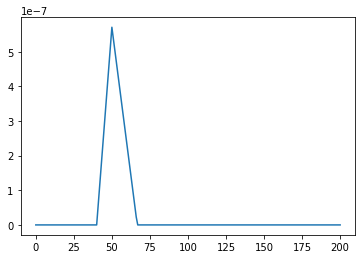

In [24]:
df_ex1_freq['reliable_fraction_of_MI'].plot()

### 5.2 Conclusion

Although ${X, Y} \in N(0, 1)$ is independent, it still shows dependency with more bins by chance. After using permutation model, we can find with bins increasing, bias term is increasing. We can get accurate result.  

### 5.2 Experiment 2
In this case, we want to test MI gain of dependent continuous variables $(X,Y) \in N(0, 1)$  
We set
$$ y_i=\left\{\begin{array}{ll}
1 & \text { for } x_i \leq 0 \\
0 & \text { otherwise }
\end{array}\right.$$

Similarly, We use method: `equal frequency`  

__Equal frequency__

In [25]:
col_dict = dict(zip(['fraction_of_MI', 'reliable_fraction_of_MI'], [[0 for _ in range(201)] for _ in range(2)]))
df_ex2_freq = pd.DataFrame(col_dict)
rep = 20
for i in range(rep):
    mu, sigma = 0, 1 # mean and standard deviation
    x = np.random.normal(mu, sigma, 200)
    x = abs(x)
    for i in range(len(x)):
        if i < len(x)/2:
            x[i] = -1 * x[i]
    y = []
    for each in x:
        if each <= 0:
            res = 1
        else:
            res = 0
        y.append(res)
    y = np.array(y)
    for each in range(0, 201):
        # variable selection
        bin_indi_variables, bin_multi_variables = VariableSelectionMI(estimator = naive_estimate, 
                                                                      x = x, 
                                                                      y = y, 
                                                                      column_names = ['x'],
                                                                      bin_type = 'freq',
                                                                      xbin=True,
                                                                      x_bin = each,
                                                                      ybin=False).summary()
        df_ex2_freq.loc[each, 'fraction_of_MI'] += bin_indi_variables[0][0]/rep
        
        bin_indi_variables, bin_multi_variables = VariableSelectionMI(estimator = naive_estimate, 
                                                                      x = x, 
                                                                      y = y, 
                                                                      column_names = ['x'],
                                                                      bin_type = 'freq',
                                                                      xbin=True,
                                                                      x_bin = each,
                                                                      ybin=False, permut=True).summary()
        df_ex2_freq.loc[each, 'reliable_fraction_of_MI'] += bin_indi_variables[0][0]/rep

Text(0, 0.5, 'MI Gain')

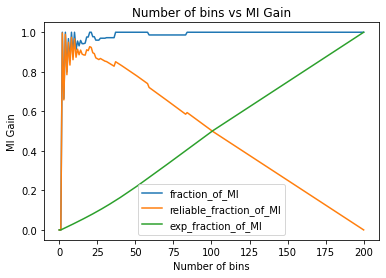

In [26]:
df_ex2_freq['exp_fraction_of_MI'] = df_ex2_freq['fraction_of_MI'] - df_ex2_freq['reliable_fraction_of_MI']
ax = df_ex2_freq.plot(title='Number of bins vs MI Gain')
ax.set_xlabel("Number of bins")
ax.set_ylabel("MI Gain")

In [35]:
# df_ex2_freq.reliable_fraction_of_MI.tolist().index(df_ex2_freq.reliable_fraction_of_MI.max())

### 5.3 Conclusion

In this section, ${X} \rightarrow Y \in \{0, 1\}$ is dependent, it should show highest MI when bins =2. After experiment, it shows the highest of mutual information when bins=2, which matches our expectation. After that, with more bins, MI will drop because of closer to uniform distribution in each bin. Thus, highest MI will be our reliable MI.